$$
In\;the\;name\;of\;God 
\\HW1\;NeuralNetwork
\\Abbas\;Mohamadiyan\;810898059
$$

In [2]:
#plan of action:
    #1-prepare the data:                                       done
        #load                                                      done                
        #trim                                                      done
        #partition (train, validation, test)                       done
    #2-write SGD on a train data & determined hyperparameters: done
    #3-set hyperparameters on validation data:                 done
    #4-submit 
    

# part 1

In [3]:
from sklearn import datasets
import numpy as np
data = datasets.load_diabetes()
X = data.data
Y = data.target

In [6]:
n, d = X.shape
trsize = int(0.7*n)
vasize = int(0.85*n)
Xt = X[0:trsize, :] ; Yt = Y[0:trsize]
Xv = X[trsize:vasize, :] ; Yv = Y[trsize:vasize]
Xte = X[vasize:n, :] ; Yte = Y[vasize:n]
print(Xt.shape)
print(Xv.shape)
print(Xte.shape)

(309, 10)
(66, 10)
(67, 10)


In [7]:
print(X[308,:] == Xt[308,:])
print(X[309,:] == Xv[0,:])
print(X[375,:] == Xte[0,:])

[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True]


$$
J(\tilde{W}) = ||Y-\tilde{D}\tilde{W}||^2 + \alpha ||\tilde{W}||^2
\\ SGD:
\\ \nabla_{\tilde{W}} = \frac{\partial}{\partial\tilde{W}}(J(\tilde{W}))=-\tilde{D^T}Y+(\tilde{D^T}\tilde{D})\tilde{W}+ \alpha \tilde{W}
$$

# part 2

In [12]:
### SGD ###
def SGD(X,Y,eta=0.001,eps=1e-4,alpha=0.01):
    n,d = X.shape
    Dt = np.hstack((np.ones((n,1)),X))
    W0 = np.random.randn(d+1)
    epoch = 1
    while True:
        ii = np.arange(n)
        np.random.shuffle(ii)
        for i in ii:
            x,y = Dt[i],Y[i]
            Dw = -x*(y-x@W0) + alpha*W0
            W = W0 - eta*Dw
            chg = sum(abs(W/W0-1))
            if chg < eps: break
            W0 = W
        epoch += 1
        if epoch > 10000: break
    print(f"epoch {epoch} with W change: {chg:0.5f}")
    return W
    
W = SGD(Xt,Yt)
print(W.round(3))

epoch 10001 with W change: 0.00010
[149.771  26.437 -18.114 136.668  92.407  26.915  13.155 -80.157  77.82
 129.298  76.84 ]


In [9]:
no, d = Xt.shape

In [10]:
np.linalg.norm(Yt-np.hstack((np.ones((no,1)), Xt)) @ W)**2/no

4310.097100652206

# part 3

In [13]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [14]:
def newSGD(X,Y,W0,alpha,eta=0.001,eps=1e-4):
    n,d = X.shape
    Dt = np.hstack((np.ones((n,1)),X))
    #W0 = np.random.randn(d+1)
    epoch = 1
    while True:
        ii = np.arange(n)
        np.random.shuffle(ii)
        for i in ii:
            x,y = Dt[i],Y[i]
            Dw = -x*(y-x@W0) + alpha*W0
            W = W0 - eta*Dw
            chg = sum(abs(W/W0-1))
            if chg < eps: break
            W0 = W
        epoch += 1
        if epoch > 10000: break
    print(f"epoch {epoch} with W change: {chg:0.5f}")
    return W


In [17]:
Alphas = np.arange(0, 1, 0.1)
Errors = []
nu, d = Xv.shape

In [18]:
for i in tqdm(Alphas):
    newW = newSGD(Xv, Yv, W, i)
    Errors.append(np.linalg.norm(Yv-np.hstack((np.ones((nu,1)), Xv)) @ newW)**2/nu)
    

  0%|          | 0/10 [00:00<?, ?it/s]

epoch 10001 with W change: 0.00002
epoch 10001 with W change: 0.00439
epoch 10001 with W change: 0.00524
epoch 10001 with W change: 0.00529
epoch 10001 with W change: 0.02214
epoch 10001 with W change: 0.00644
epoch 10001 with W change: 0.02644
epoch 10001 with W change: 0.02353
epoch 10001 with W change: 0.00767
epoch 10001 with W change: 0.02651


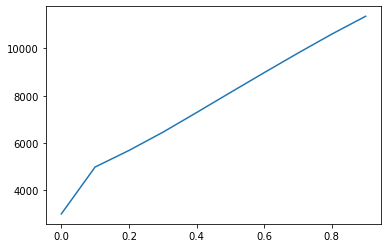

In [19]:
plt.plot(Alphas, Errors)
plt.show()

In [20]:
Alphas = np.arange(0, 0.1, 0.01)
Errors = []
nu, d = Xv.shape

In [21]:
for i in tqdm(Alphas):
    newW = newSGD(Xv, Yv, W, i)
    Errors.append(np.linalg.norm(Yv-np.hstack((np.ones((nu,1)), Xv)) @ newW)**2/nu)

  0%|          | 0/10 [00:00<?, ?it/s]

epoch 10001 with W change: 0.00001
epoch 10001 with W change: 0.00009
epoch 10001 with W change: 0.00721
epoch 10001 with W change: 0.00176
epoch 10001 with W change: 0.00091
epoch 10001 with W change: 0.00294
epoch 10001 with W change: 0.00541
epoch 10001 with W change: 0.00716
epoch 10001 with W change: 0.00322
epoch 10001 with W change: 0.00204


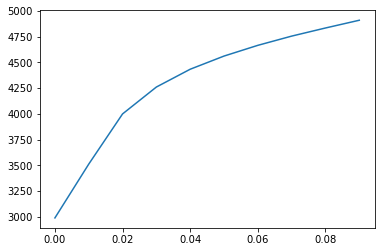

In [22]:
plt.plot(Alphas, Errors)
plt.show()

In [23]:
Alphas = np.arange(0, 0.01, 0.001)
Errors = []
nu, d = Xv.shape

In [24]:
for i in tqdm(Alphas):
    newW = newSGD(Xv, Yv, W, i)
    Errors.append(np.linalg.norm(Yv-np.hstack((np.ones((nu,1)), Xv)) @ newW)**2/nu)

  0%|          | 0/10 [00:00<?, ?it/s]

epoch 10001 with W change: 0.00002
epoch 10001 with W change: 0.00008
epoch 10001 with W change: 0.00008
epoch 10001 with W change: 0.00009
epoch 10001 with W change: 0.00009
epoch 10001 with W change: 0.00004
epoch 10001 with W change: 0.00009
epoch 10001 with W change: 0.00010
epoch 10001 with W change: 0.00009
epoch 10001 with W change: 0.00009


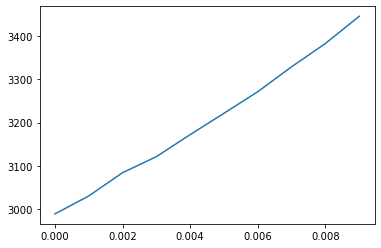

In [25]:
plt.plot(Alphas, Errors)
plt.show()

In [26]:
Alphas = np.arange(0, 0.001, 0.0001)
Errors = []
nu, d = Xv.shape

In [27]:
for i in tqdm(Alphas):
    newW = newSGD(Xv, Yv, W, i)
    Errors.append(np.linalg.norm(Yv-np.hstack((np.ones((nu,1)), Xv)) @ newW)**2/nu)

  0%|          | 0/10 [00:00<?, ?it/s]

epoch 10001 with W change: 0.00005
epoch 10001 with W change: 0.00002
epoch 10001 with W change: 0.00002
epoch 10001 with W change: 0.00002
epoch 10001 with W change: 0.00001
epoch 10001 with W change: 0.00009
epoch 10001 with W change: 0.00010
epoch 10001 with W change: 0.00002
epoch 10001 with W change: 0.00001
epoch 10001 with W change: 0.00010


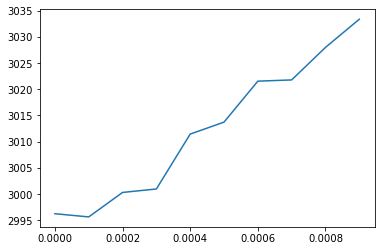

In [28]:
plt.plot(Alphas, Errors)
plt.show()

In [29]:
finalW = newSGD(Xt, Yt, W, 0.0001)

epoch 10001 with W change: 0.00009


In [30]:
num, d = Xte.shape
MSEtest = np.linalg.norm(Yte-np.hstack((np.ones((num,1)), Xte)) @ finalW)**2/num
print(MSEtest)

3183.218755128832


In [31]:
MSEtotal = np.linalg.norm(Y-np.hstack((np.ones((n,1)), X)) @ finalW)**2/n
print(MSEtotal)

3326.0611682788926


In [2]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930
